<a href="https://colab.research.google.com/github/SouravPetal/Machine_learning/blob/main/Crop-Yield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libaries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Uploading the dataset**

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/ML LAB/crop_yield2.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#display the 5 rows of the dataset
data1.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814,56708.0,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637,4685.0,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796,22.0,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656,126905000.0,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739,794.0,2051.4,165500.63,539.09,0.420909


In [ ]:
#display the numbers of rows and columns
data1.shape

(19689, 10)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19688 non-null  object 
 4   Area             19678 non-null  object 
 5   Production       19668 non-null  float64
 6   Annual_Rainfall  19658 non-null  float64
 7   Fertilizer       19667 non-null  float64
 8   Pesticide        19680 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data1.describe()

,Crop_Year,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.966800e+04,19658.000000,1.966700e+04,1.968000e+04,19689.000000
mean,2009.110569,1.651069e+07,1441.944972,2.376845e+07,4.786647e+04,82.521546
std,6.508763,2.631993e+08,823.617362,8.823979e+07,1.810247e+05,882.534047
min,1997.000000,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.379000e+03,940.700000,1.873902e+05,3.546025e+02,0.597857
50%,2010.000000,1.380000e+04,1247.600000,1.237478e+06,2.421150e+03,1.028462
75%,2015.000000,1.227022e+05,1648.200000,9.968709e+06,1.997912e+04,2.384815
max,2020.000000,6.326000e+09,6552.700000,1.754789e+09,3.780111e+06,21105.000000


In [ ]:
#check the null value present or not
data1.isnull()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
19684,False,False,False,False,False,False,False,False,False,False
19685,False,False,False,False,False,False,True,False,False,False
19686,False,False,False,False,False,False,False,False,False,False
19687,False,False,False,False,False,False,False,False,False,False


In [ ]:
#numbers of null values present in the dataset
data1.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,1
Area,11
Production,21
Annual_Rainfall,31
Fertilizer,22
Pesticide,9
Yield,0


In [ ]:
#drop the state column
#data = data.drop('State', axis=1)

In [ ]:
#convert the area into numeric
data1['Area'] = pd.to_numeric(data1['Area'], errors='coerce')

In [ ]:
# Assuming 'data' is your DataFrame
for col in data1.select_dtypes(include=['number']).columns:
    # Calculate the mean of the column, ignoring NaN values
    mean_val = data1[col].mean()

    # Fill NaN values in the column with the calculated mean
    data1[col].fillna(mean_val, inplace=True)

<ipython-input-301-25d45cac3298>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1[col].fillna(mean_val, inplace=True)


In [ ]:
#check the null value present or not
data1.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,1
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
data1.head(10)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.00000,56708.0,2051.4,7.024878e+06,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.00000,4685.0,2051.4,6.316433e+05,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.00000,22.0,2051.4,7.575532e+04,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.00000,126905000.0,2051.4,1.870662e+06,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.00000,794.0,2051.4,1.655006e+05,539.09,0.420909
5,Dry chillies,1997,Whole Year,Assam,176650.79003,9073.0,2051.4,2.376845e+07,4211.97,0.643636
6,Gram,1997,Rabi,Assam,2979.00000,1507.0,2051.4,2.835114e+05,923.49,0.465455
7,Jute,1997,Kharif,Assam,94520.00000,904095.0,2051.4,8.995468e+06,29301.20,9.919565
8,Linseed,1997,Rabi,Assam,10098.00000,5158.0,2051.4,9.610267e+05,3130.38,0.461364
9,Maize,1997,Kharif,Assam,19216.00000,14721.0,2051.4,1.828787e+06,5956.96,0.615652


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19688 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  float64
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 1.5+ MB


<ipython-input-305-dbe3dcf895c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data=data1, palette = 'magma')


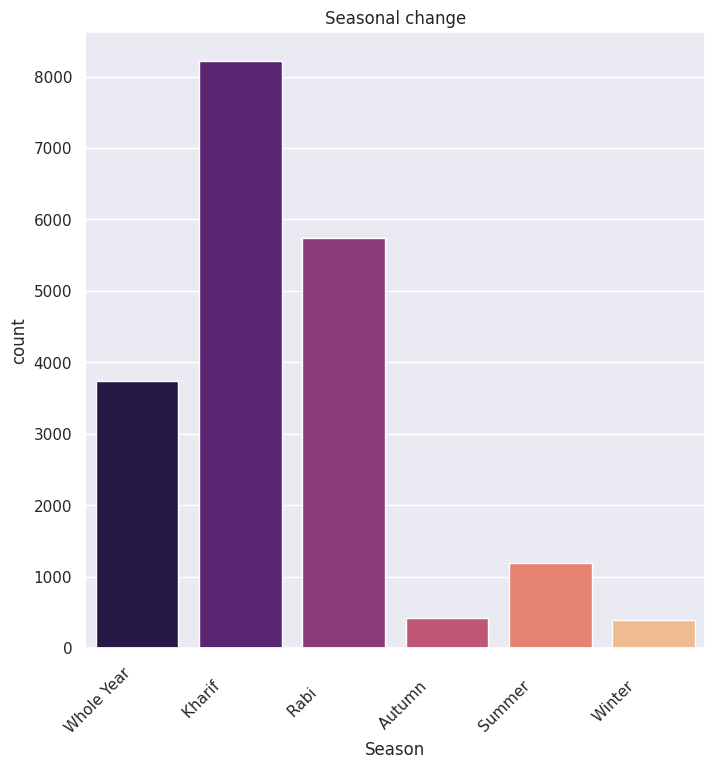

In [ ]:
import seaborn as sns
sns.set()
plt.figure(figsize=(8,8))
# If 'Season' is categorical and you want to visualize its frequency:
sns.countplot(x='Season', data=data1, palette = 'magma')

plt.title('Seasonal change')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

<ipython-input-306-239e844f4f27>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['Annual_Rainfall'], kde=False, color = 'darkred')


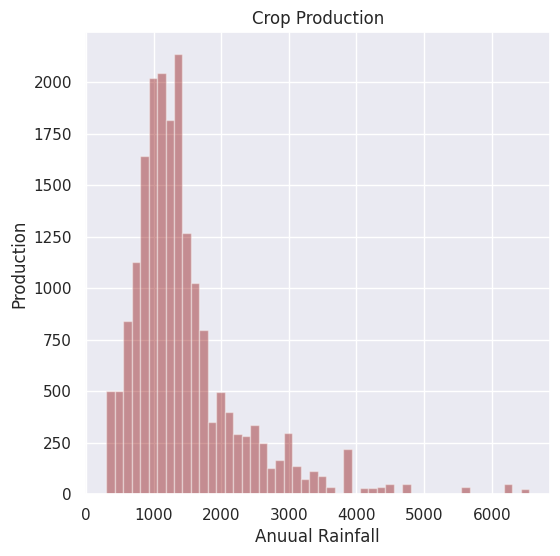

In [ ]:
plt.figure(figsize=(6,6))
# Remove the extra tab character from the column name
sns.distplot(data1['Annual_Rainfall'], kde=False, color = 'darkred')
plt.title('Crop Production')
plt.xlabel('Anuual Rainfall')
plt.ylabel('Production')
plt.show()

<ipython-input-307-b21ce09f9409>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'State', y = 'Annual_Rainfall', data =data1, palette = 'summer')


<Axes: xlabel='State', ylabel='Annual_Rainfall'>

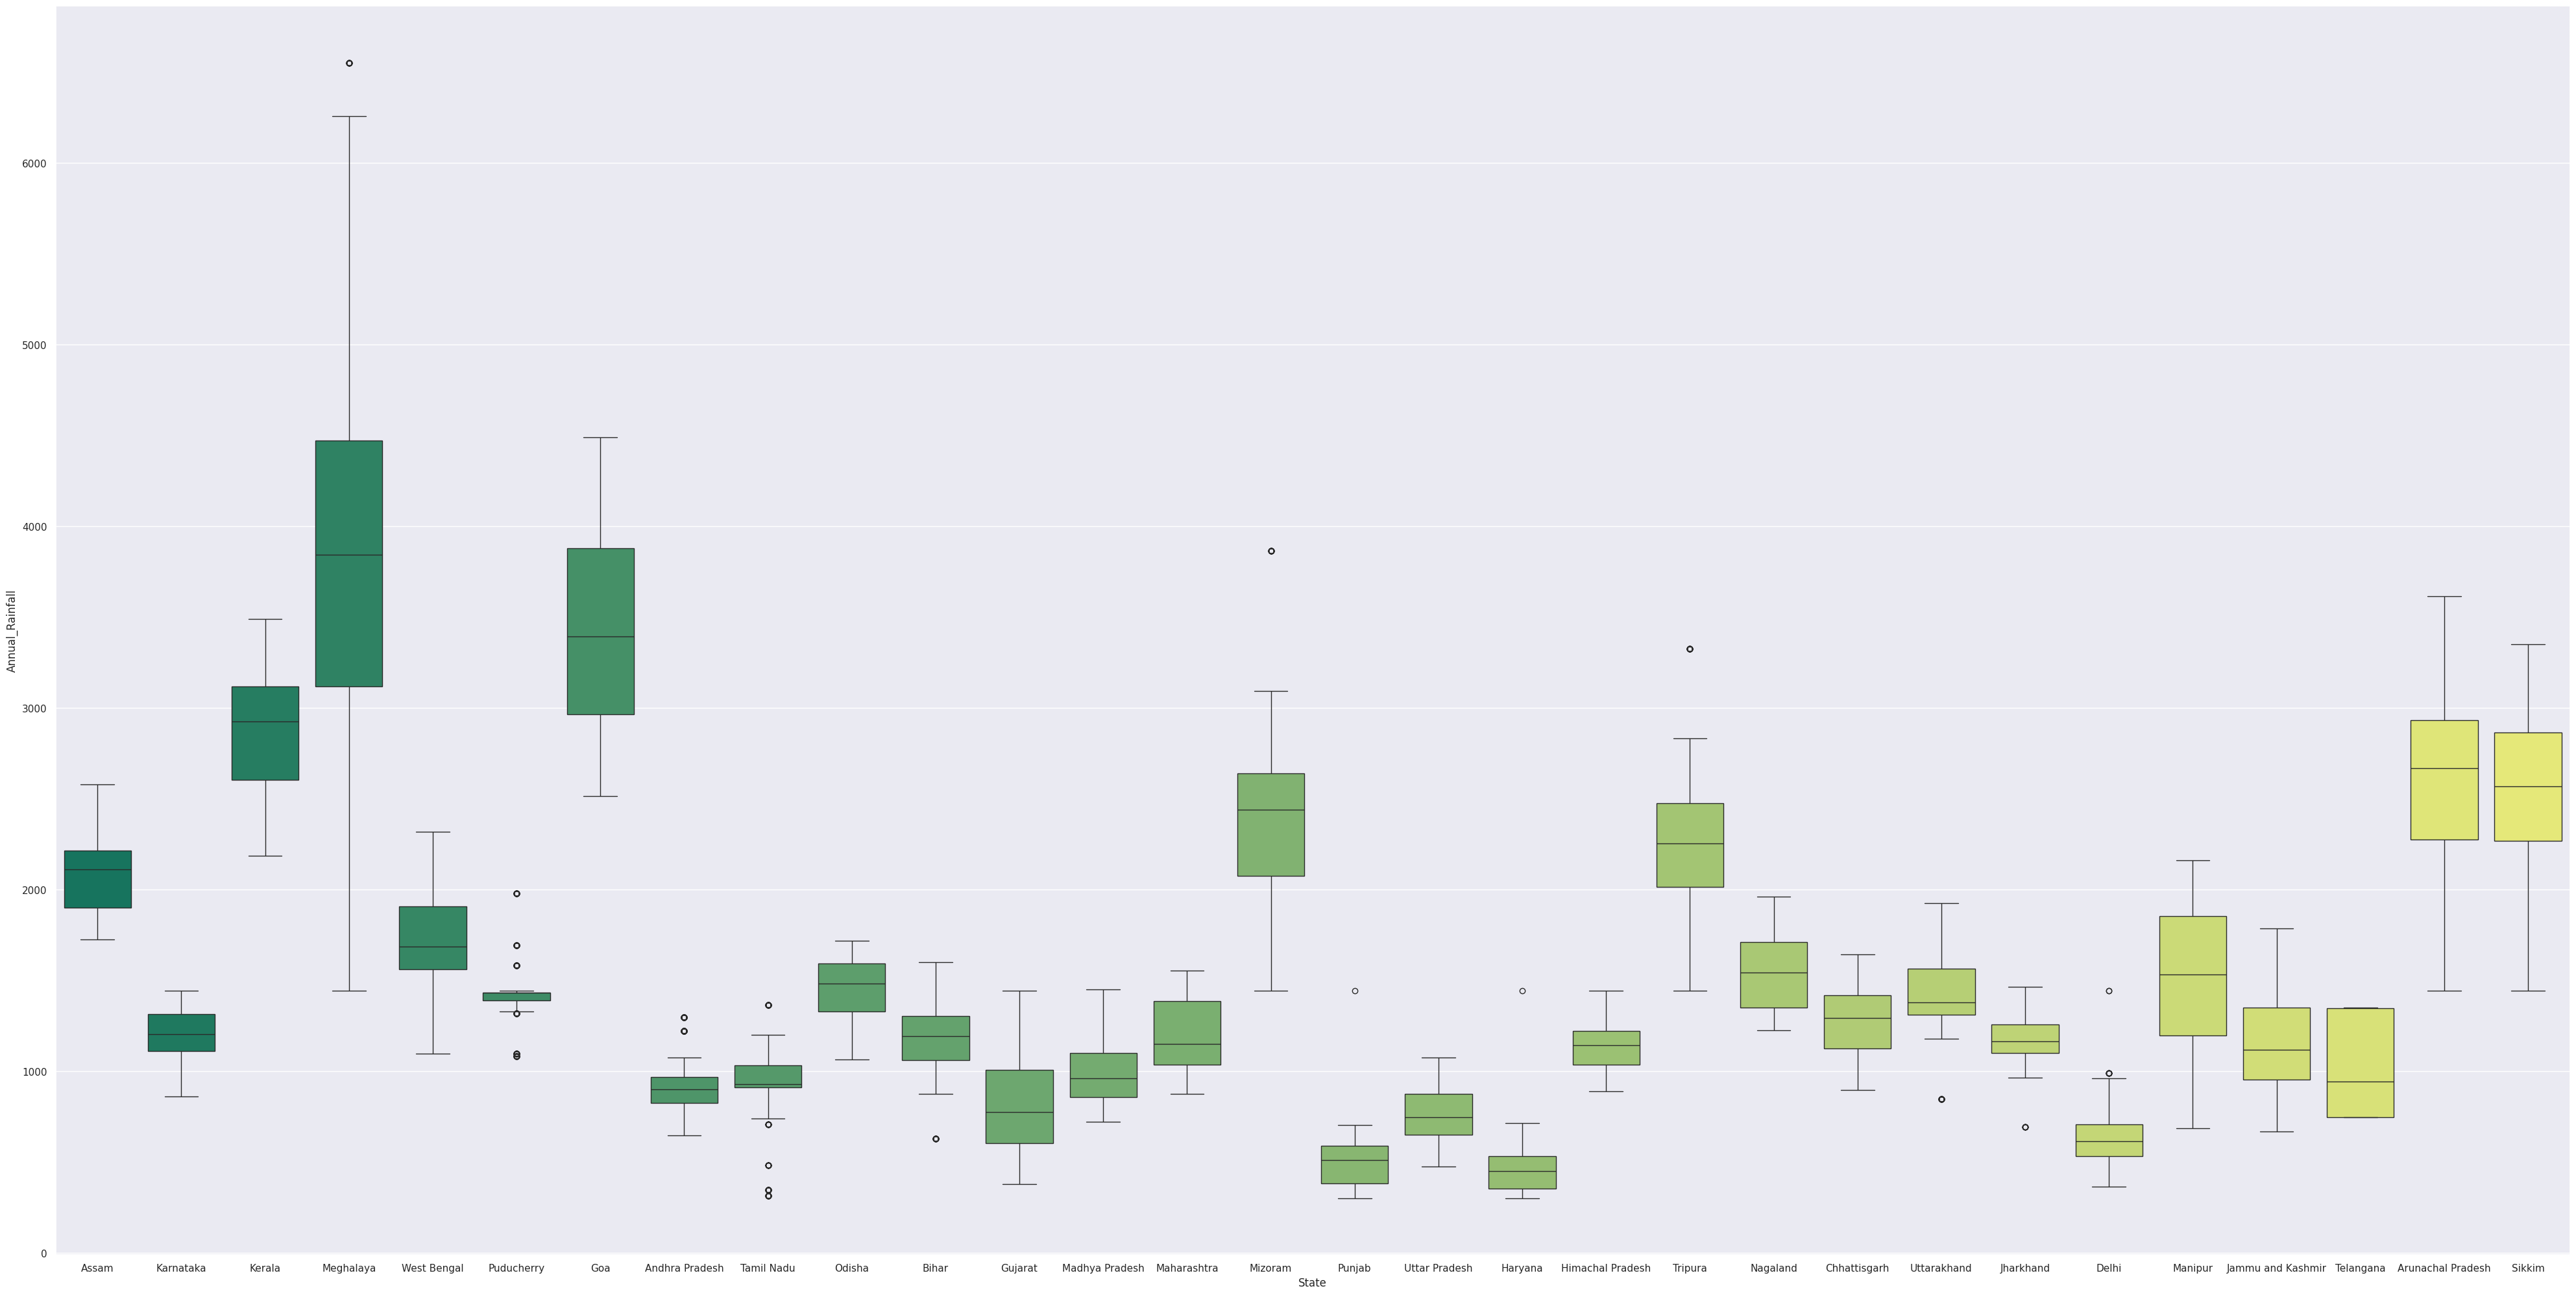

In [ ]:
plt.figure(figsize = (50, 25))
sns.boxplot(x = 'State', y = 'Annual_Rainfall', data =data1, palette = 'summer')

In [ ]:
# Encode categorical columns (Crop, Season, State)
categorical_columns = ['Crop', 'Season', 'State']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(data1[categorical_columns])
encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Combine encoded columns with the rest of the dataset, and drop the original ones.
# This step was missing or done incorrectly causing the error.
data1 = pd.concat([data1.drop(columns=categorical_columns), encoded_df], axis=1)

In [ ]:
#then check the null values present or not
data1.isnull().sum()

,0
Crop_Year,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
...,...
State_Tripura,0
State_Uttar Pradesh,0
State_Uttarakhand,0
State_West Bengal,0


In [ ]:
data1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
19684,False
19685,False
19686,False
19687,False


In [ ]:
#drop the duplicate rows
data1=data1.drop_duplicates()
data1

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Arecanut,Crop_Arhar/Tur,Crop_Bajra,...,State_Puducherry,State_Punjab,State_Sikkim,State_Tamil Nadu,State_Telangana,State_Tripura,State_Uttar Pradesh,State_Uttarakhand,State_West Bengal,State_nan
0,1997,73814.0,56708.0,2051.400000,7024878.38,22882.34,0.796087,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1997,6637.0,4685.0,2051.400000,631643.29,2057.47,0.710435,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1997,796.0,22.0,2051.400000,75755.32,246.76,0.238333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1997,19656.0,126905000.0,2051.400000,1870661.52,6093.36,5238.051739,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,1739.0,794.0,2051.400000,165500.63,539.09,0.420909,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19684,1998,4000.0,2000.0,1498.000000,395200.00,1160.00,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19685,1998,1000.0,3000.0,1441.944972,98800.00,290.00,3.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19686,1997,310883.0,440900.0,1356.200000,29586735.11,96373.73,1.285000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19687,1997,275746.0,5488.0,1356.200000,26242746.82,85481.26,0.016667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data1.shape

(19617, 99)

In [ ]:
#data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

In [ ]:
#X is indenpent,y is dependent
X=data1.drop(columns=['Yield'])
y=data1['Yield']

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=0) # using SimpleImputer to replace NaNs with 0 or any constant strategy as required.
X = imputer.fit_transform(X)

In [ ]:
#model fiiting
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print (X_std)

[[-1.86701458 -0.1620074  -0.0623628  ... -0.20103155 -0.24161135
  -0.00713994]
 [-1.86701458 -0.26755242 -0.06256022 ... -0.20103155 -0.24161135
  -0.00713994]
 [-1.86701458 -0.2767295  -0.06257791 ... -0.20103155 -0.24161135
  -0.00713994]
 ...
 [-1.86701458  0.21046314 -0.06090487 ... -0.20103155 -0.24161135
  -0.00713994]
 [-1.86701458  0.1552577  -0.06255717 ... -0.20103155 -0.24161135
  -0.00713994]
 [-1.86701458  0.09806477 -0.06108983 ... -0.20103155 -0.24161135
  -0.00713994]]


In [ ]:
lm=LinearRegression()

In [ ]:
# Impute missing values in the target variable 'y' using the mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Use 'mean' or other appropriate strategy
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))  # Reshape for SimpleImputer

# Now, use the imputed target variable for training
lm.fit(X_std, y_imputed)
print("Estimated coefficients:", lm.coef_, "and length:", len(lm.coef_))
print("Intercept:", lm.intercept_)

Estimated coefficients: [[ 6.41172230e+00 -1.57181744e+01 -1.78572356e+01  4.05279437e+00
   1.17206834e+01 -2.13674216e+00 -7.60041015e+00 -1.22899314e+01
  -1.34964605e+01 -8.04068071e+00 -9.09248828e+00 -5.13414224e+00
  -6.30128536e+00 -6.55814256e+00 -1.01230553e+01  8.07075670e+02
  -1.19849189e+01 -1.14218100e+01 -6.67637008e+00 -1.57926600e+01
  -1.12535603e+01 -1.10200278e+01 -1.14137707e+01 -1.27748923e+01
  -6.16002743e+00 -1.12362312e+01 -1.23597878e+01 -6.16452816e+00
  -4.91328282e+00 -9.04678543e+00 -1.56328430e+01 -9.07792022e+00
  -7.83257366e+00 -1.60789720e+01 -6.06610264e+00 -7.52096329e+00
  -4.28203876e+00 -1.28651684e+01 -7.74434195e+00 -6.57022006e+00
  -9.14238530e+00 -2.45443294e+00 -9.37451358e+00 -1.44405069e+01
  -1.14847760e+01 -1.16580048e+01 -1.18993453e+01 -7.66494350e+00
  -9.40628021e+00 -1.58732655e+01 -1.29940864e+01 -9.87052877e+00
  -9.19628017e+00 -1.22170793e+01 -1.08523847e+01 -8.72777561e+00
  -1.42782806e+01 -1.33568631e+01 -1.57588487e+01 -9

In [ ]:
# Impute missing values in the target variable 'X' using the mean
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')  # Use 'mean' or other appropriate strategy
# X_imputed = imputer.fit_transform(X)  # Impute missing values in X

# # Now, scale the imputed feature matrix
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X_imputed)  # Scale the imputed data

In [ ]:
X

array([[1.99700e+03, 7.38140e+04, 5.67080e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.99700e+03, 6.63700e+03, 4.68500e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.99700e+03, 7.96000e+02, 2.20000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.99700e+03, 3.10883e+05, 4.40900e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.99700e+03, 2.75746e+05, 5.48800e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.99700e+03, 2.39344e+05, 3.92160e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [ ]:
y

,Yield
0,0.796087
1,0.710435
2,0.238333
3,5238.051739
4,0.420909
...,...
19684,0.500000
19685,3.000000
19686,1.285000
19687,0.016667


In [ ]:
def my_fit_transform(X):
    return ((X - np.mean(X)) / np.std(X))

In [ ]:
X_my_std = my_fit_transform(X)
X_my_std

array([[-0.01457953, -0.0120348 , -0.01264093, ..., -0.01465029,
        -0.01465029, -0.01465029],
       [-0.01457953, -0.01441512, -0.01448429, ..., -0.01465029,
        -0.01465029, -0.01465029],
       [-0.01457953, -0.01462209, -0.01464951, ..., -0.01465029,
        -0.01465029, -0.01465029],
       ...,
       [-0.01457953, -0.00363462,  0.00097234, ..., -0.01465029,
        -0.01465029, -0.01465029],
       [-0.01457953, -0.00487965, -0.01445583, ..., -0.01465029,
        -0.01465029, -0.01465029],
       [-0.01457953, -0.0061695 , -0.00075469, ..., -0.01465029,
        -0.01465029, -0.01465029]])

In [ ]:
#np.round(X_std) - np.round(X_my_std)

In [ ]:
y_pred = lm.predict(X_std)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y_imputed,test_size=0.2, random_state=2)

In [ ]:
print(y_pred)

[[-29.401184  ]
 [-72.24204241]
 [-77.24882894]
 ...
 [ -9.2436684 ]
 [ 13.47159158]
 [  1.24863308]]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

y_pred = lm.predict(X_std)

# calculate the Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_imputed, y_pred)
my_mse_lr = (1/len(y) * np.sum(np.square(y_imputed - y_pred)))

# calculate the Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_lr)
my_rmse_lr = np.sqrt(my_mse_lr)

print (f"Calculated Mean Squared Error (MSE): {mse_lr} and {my_mse_lr}...")
print (f"Calculated Root Mean Squared Error (RMSE): {rmse_lr} and {my_rmse_lr}...")

# calculate the Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_imputed, y_pred)
my_mae_lr = np.mean(np.abs(y_imputed - y_pred))

# calculate the Root Mean Error (RME)
rme_lr = np.sqrt(mae_lr)
my_rme_lr = np.sqrt(my_mae_lr)

print (f"Calculated Mean Absolute Error (MAE): {mae_lr} and {my_mae_lr}...")
print (f"Calculated Root Mean Error (RME): {rme_lr} and {my_rme_lr}...")

Calculated Mean Squared Error (MSE): 116833.75780087247 and 116833.75780087245...
Calculated Root Mean Squared Error (RMSE): 341.80953439140995 and 341.80953439140995...
Calculated Mean Absolute Error (MAE): 58.707962555325906 and 58.707962555325906...
Calculated Root Mean Error (RME): 7.662112147138405 and 7.662112147138405...


**For LASSO**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter
lasso_model.fit(X_std, y_imputed)

Lasso()

In [ ]:
y_pred = lasso_model.predict(X_std)

# calculate the Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_imputed, y_pred)
my_mse_lasso = (1/len(y_imputed) * np.sum(np.square(y - y_pred)))

# calculate the Root Mean Squared Error (RMSE)
rmse_lasso = np.sqrt(mse_lasso)
my_rmse_lasso = np.sqrt(my_mse_lasso)

print (f"Calculated Mean Squared Error (MSE): {mse_lasso} and {my_mse_lasso}...")
print (f"Calculated Root Mean Squared Error (RMSE): {rmse_lasso} and {my_rmse_lasso}...")

# calculate the Mean Absolute Error (MAE)
mae_lasso = mean_absolute_error(y_imputed, y_pred)
my_mae_lasso = np.mean(np.abs(y_imputed - y_pred))

# calculate the Root Mean Error (RME)
rme_lasso = np.sqrt(mae_lasso)
my_rme_lasso = np.sqrt(my_mae_lasso)

print (f"Calculated Mean Absolute Error (MAE): {mae_lasso} and {my_mae_lasso}...")
print (f"Calculated Root Mean Error (RME): {rme_lasso} and {my_rme_lasso}...")

Calculated Mean Squared Error (MSE): 116924.86174936325 and 116924.86174936323...
Calculated Root Mean Squared Error (RMSE): 341.94277554784406 and 341.942775547844...
Calculated Mean Absolute Error (MAE): 54.43534378960635 and 179.93411484955791...
Calculated Root Mean Error (RME): 7.378031159435852 and 13.4139522456865...


**For Ridge**

In [ ]:
# implementing RIDGE regression
from sklearn.linear_model import Ridge
regr_ridge = Ridge(alpha = 0.5)

In [ ]:
ridge_model = regr_ridge.fit(X_std, y_imputed)
print ("Estimated coefficients:", ridge_model.coef_, "and length:", len(ridge_model.coef_))
print ("Intercept:", ridge_model.intercept_)

Estimated coefficients: [ 6.41308551e+00 -1.56991961e+01 -1.78333270e+01  4.04787491e+00
  1.17016014e+01 -2.13680015e+00 -7.60158393e+00 -1.22887515e+01
 -1.34953914e+01 -8.04201769e+00 -9.09128100e+00 -5.13546179e+00
 -6.30182816e+00 -6.55923179e+00 -1.01221742e+01  8.07038040e+02
 -1.19855352e+01 -1.14208106e+01 -6.67583180e+00 -1.57933064e+01
 -1.12542800e+01 -1.10201496e+01 -1.14123142e+01 -1.27739602e+01
 -6.16006005e+00 -1.12351225e+01 -1.23586028e+01 -6.16392951e+00
 -4.91273759e+00 -9.04572525e+00 -1.56311048e+01 -9.07676470e+00
 -7.83212399e+00 -1.60775672e+01 -6.06541564e+00 -7.52035580e+00
 -4.28221426e+00 -1.28653762e+01 -7.74349947e+00 -6.56935436e+00
 -9.14158379e+00 -2.45435033e+00 -9.37333714e+00 -1.44407415e+01
 -1.14839211e+01 -1.16565293e+01 -1.18981739e+01 -7.66411781e+00
 -9.40650109e+00 -1.58720825e+01 -1.29929249e+01 -9.86949275e+00
 -9.19860735e+00 -1.22159163e+01 -1.08532748e+01 -8.72847494e+00
 -1.42791692e+01 -1.33579124e+01 -1.57574235e+01 -9.53209836e+00
 

In [ ]:
y_pred = ridge_model.predict(X_std)
# calculate the Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_imputed, y_pred)
my_mse_ridge = (1/len(y_imputed) * np.sum(np.square(y_imputed - y_pred)))

# calculate the Root Mean Squared Error (RMSE)
rmse_ridge = np.sqrt(mse_ridge)
my_rmse_ridge = np.sqrt(my_mse_ridge)

print (f"Calculated Mean Squared Error (MSE): {mse_ridge} and {my_mse_ridge}...")
print (f"Calculated Root Mean Squared Error (RMSE): {rmse_ridge} and {my_rmse_ridge}...")

# calculate the Mean Absolute Error (MAE)
mae_ridge = mean_absolute_error(y_imputed, y_pred)
my_mae_ridge = np.mean(np.abs(y_imputed - y_pred))

# calculate the Root Mean Error (RME)
rme_ridge = np.sqrt(mae_ridge)
my_rme_ridge = np.sqrt(my_mae_ridge)

print (f"Calculated Mean Absolute Error (MAE): {mae_ridge} and {my_mae_ridge}...")
print (f"Calculated Root Mean Error (RME): {rme_ridge} and {my_rme_ridge}...")

Calculated Mean Squared Error (MSE): 116833.75860621751 and 27779487398.039837...
Calculated Root Mean Squared Error (RMSE): 341.80953556947105 and 166671.79544853963...
Calculated Mean Absolute Error (MAE): 58.70870363764369 and 184.34057311863188...
Calculated Root Mean Error (RME): 7.662160507170526 and 13.577207854291393...


**For plotting the chart between linear regression,lasso,ridge**

In [ ]:
data = {
    "metrics": ["MSE", "RMSE", "MAE", "RME"],
    "linear_regression" : [mse_lr, rmse_lr, mae_lr, rme_lr],
    "lasso_regression" : [mse_lasso, rmse_lasso, mae_lasso, rme_lasso],
    "ridge_regression" : [mse_ridge, rmse_ridge, mae_ridge, rme_ridge]
}

In [ ]:
df=pd.DataFrame(data)

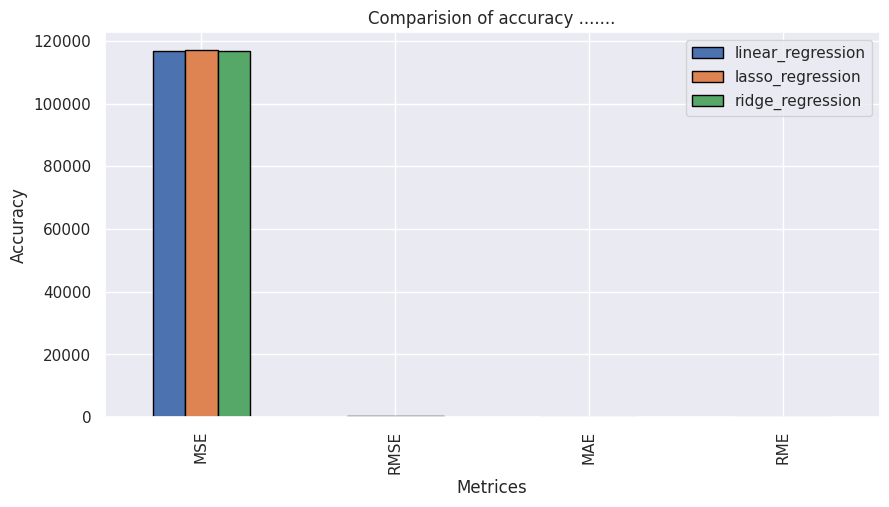

In [ ]:
df.plot(x="metrics", kind="bar", figsize=(10,5), edgecolor="black")
plt.title("Comparision of accuracy .......")
plt.xlabel("Metrices")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#basically the MSE value are too big so create a chart without use MSE
data = {
    "metrics": [ "RMSE", "MAE", "RME"],
    "linear_regression" : [rmse_lr, mae_lr, rme_lr],
    "lasso_regression" : [rmse_lasso, mae_lasso, rme_lasso],
    "ridge_regression" : [rmse_ridge, mae_ridge, rme_ridge]
}

In [ ]:
df1=pd.DataFrame(data)

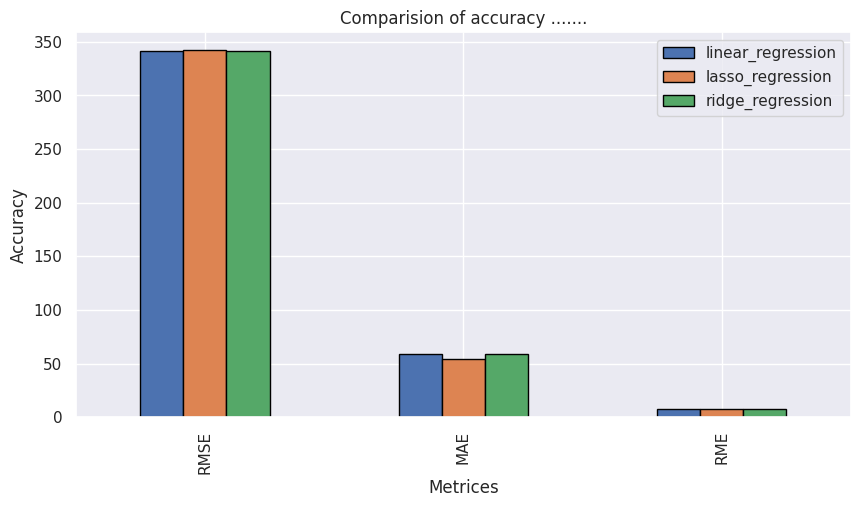

In [ ]:
df1.plot(x="metrics", kind="bar", figsize=(10,5), edgecolor="black")
plt.title("Comparision of accuracy .......")
plt.xlabel("Metrices")
plt.ylabel("Accuracy")
plt.show()